In [2]:
using Symbolics

In [7]:
@variables τ T
D = Differential(τ)
z = sech(τ/T)
b = simplify.(expand_derivatives(D(D(z))))

(-sech(τ / T) + (2//1)*(tanh(τ / T)^2)*sech(τ / T)) / (T^2)

In [ ]:
λp0 = 400 # nm
Δλ = 4 # nm
c = 3e8 * 1e9 # nm/s
w(λ) = 2π * c / λ
α(λs,λi) = exp(-(w(λs) + w(λi) - w(λp0))^2 / (2 * (2π * c * Δλ / λp0^2)^2)) 
Δk(λs, λi) = 2π * (1/λs - 1/λi)
ϕ(λs, λi) = cis(Δk(λs, λi) * 1/2) * sinc(Δk(λs, λi) * 1/2 / π)
λs = 100:1:2000
λi = 100:1:2000

αs = α.(λs', λi)
ϕs = ϕ.(λs', λi)
ψ = abs2.(αs .* ϕs)
using Plots


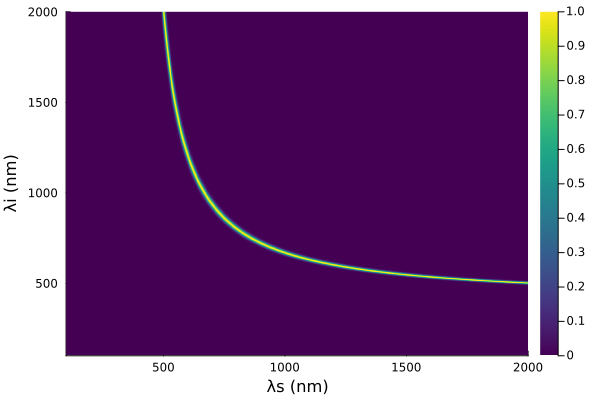

In [113]:
fig1 = heatmap(λs,λi, ψ, xlabel="λs (nm)",
                             ylabel="λi (nm)",
                                 title="", 
                                 legend=false,
                                 color=:viridis,
                                 colorbar=true)

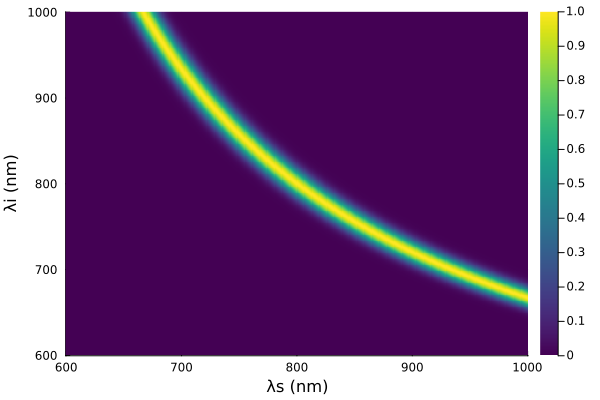

In [114]:
mask = (λs .> 599) .& (λs .< 1001) 
fig2 = heatmap(λs[mask],λi[mask], ψ[mask,mask], xlabel="λs (nm)",
                             ylabel="λi (nm)",
                                 title="", 
                                 legend=false,
                                 color=:viridis,
                                 colorbar=true)

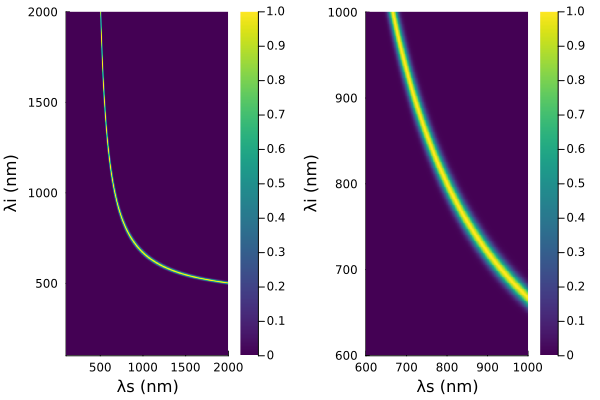

In [122]:
plot(fig1, fig2, layout=(1, 2))

In [164]:

α_2(ws,wi) = exp(-(ws + wi - w(λp0))^2 / (2 * (2π * c * Δλ / λp0^2)^2)) 
Δk_2(ws, wi) = (ws - wi)/c
ϕ_2(ws, wi) = cis(Δk_2(ws, wi) * 1/2) * sinc(Δk_2(ws, wi) * 1/2 / π)
λs = 1000:1:10000
λi = 1000:1:10000
ws = 2π * c ./ λs
wi = 2π * c ./ λi
# ws = 0:10:2000 .+10^14
# wi = 0:10:2000 
sort!(ws)
sort!(wi)


αs2 = α_2.(ws', wi)
ϕs2 = ϕ_2.(ws', wi)
ψ2 = abs2.(αs2' .* ϕs2);

┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


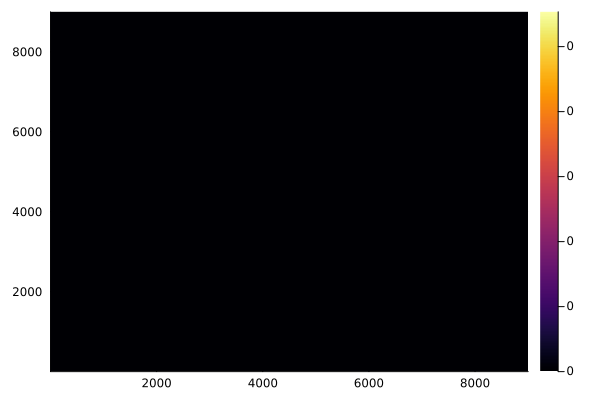

In [165]:
heatmap(αs2)
# w(λp0)

┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/nicolas/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


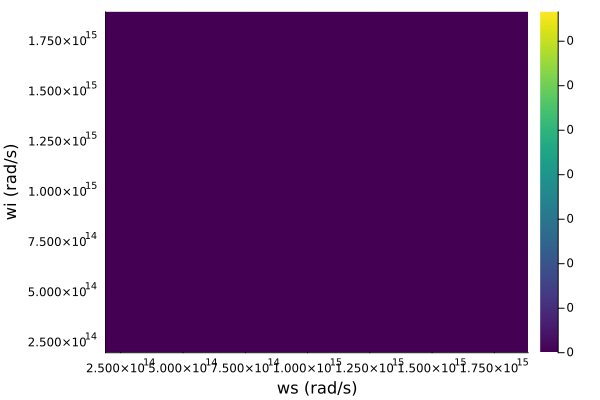

In [156]:
heatmap(ws,wi, ψ2, xlabel="ws (rad/s)",
                             ylabel="wi (rad/s)",
                                 title="", 
                                 legend=false,
                                 color=:viridis,
                                 colorbar=true)